### 几何布朗运动

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
from sklearn import metrics
import seaborn as sns
from datetime import datetime
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
from scipy.stats import norm
from math import exp
from math import log
from math import sqrt
from math import pi
inf=float("inf")
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
def MC_simple(S0,K,R,T,Sigma,N,M,b):
    """
    欧式香草期权定价，给出定价结果

    Parameters:

        S0 (float): 标的初始价格
        K (float): 期权执行价格
        R (float): 无风险利率
        T (float): 期权到期时间
        Sigma (float): 标的波动率
        N (int):不包含初始时点的时点个数
        M (int): 轨道个数
    """
    # 间隔时长
    deltaT=T/N
    # 生成正态随机数
    rand_arr=np.random.randn(M,N)
    L = [[]*(N) for i in range(M)]
    # 生成几何Brown运动
    logret=(R-0.5*Sigma**2)*deltaT+Sigma*np.sqrt(deltaT)*rand_arr
    print(len(logret[0]))
    for k in range(0,M):
        for i in range(0,N+1):
            if i==0:
                a = 0
            else:
                a = c+logret[k][i-1]
            if a>b:
                c = b
                L[k].append(b)
            else:
                c = a
                L[k].append(a)
    S=S0*np.exp(L)
    S1=np.c_[S0*np.ones((M,1)),S0*np.exp(np.cumsum(logret,1))]
    c0=np.exp(-R*T)*np.mean(np.maximum(S[:,-1]-K,0))
    print("boundary B = ",S0*np.exp(b))
    print("under the b:",c0 )
    c1=np.exp(-R*T)*np.mean(np.maximum(S1[:,-1]-K,0))
    print("b approach to inf =",c1)
    
    #画出100轨道 (with barrier)
    x=list(np.arange(1, N+2,1))
    for i in range(100):
        plt.plot(x,S[i],lw=1, ls='-',alpha=0.9)
    plt.xlabel(u'Time',fontsize=13)
    plt.ylabel(u'Price',fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid(True)
    plt.show()    
    #画出100轨道 (without barrier)
    x=list(np.arange(1, N+2,1))
    for i in range(100):
        plt.plot(x,S1[i],lw=1, ls='-',alpha=0.9)
    plt.xlabel(u'Time',fontsize=13)
    plt.ylabel(u'Price',fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid(True)
    plt.show()
    #画出有barrier的图
    x=list(np.arange(1, N+2,1))
    y=S[0]
    plt.plot(x, y, lw=1, ls='-',alpha=0.9,color='red')
    plt.xlabel(u'Time',fontsize=13)
    plt.ylabel(u'Price',fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid(True)
    plt.show()
    #画出没有有barrier的图
    x2=list(np.arange(1, N+2,1))
    y1=S1[0]
    plt.plot(x2, y1, lw=1, ls='-',alpha=0.9,color='red')
    plt.xlabel(u'Time',fontsize=13)
    plt.ylabel(u'Price',fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid(True)
    plt.show()
    
    #画出重叠图
    plt.plot(x, y, lw=1, ls='-',alpha=0.9,color='blue')
    plt.plot(x, y1, lw=1, ls='-',alpha=0.9,color='red')
    plt.xlabel(u'Time',fontsize=13)
    plt.ylabel(u'Price',fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid(True)
    plt.show()
    #生成频数图(with barrier)
    plt.hist(S[:,-1],bins=50)
    plt.xlabel(u'Final price',fontsize=13)
    plt.ylabel(u'Frequency',fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid(True)
    plt.show()
    #生成频数图(without barrier)
    plt.hist(S1[:,-1],bins=50)
    plt.xlabel(u'Final price',fontsize=13)
    plt.ylabel(u'Frequency',fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid(True)
    plt.show()
    # 生成最后的期权价格
    return np.exp(-R*T)*np.mean(np.maximum(S[:,-1]-K,0))

100
boundary B =  30.362168665982335
under the b: 7.377071495632434
b approach to inf = 10.306927402127041


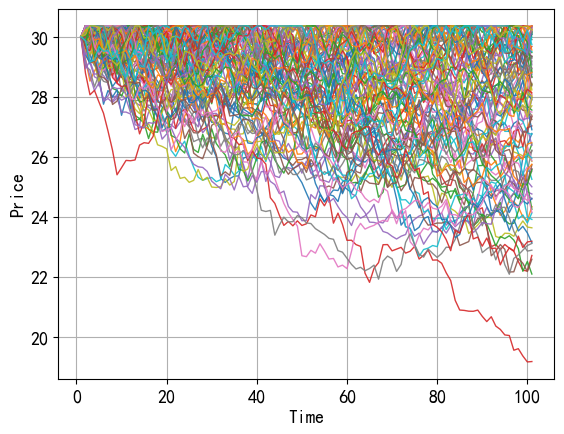

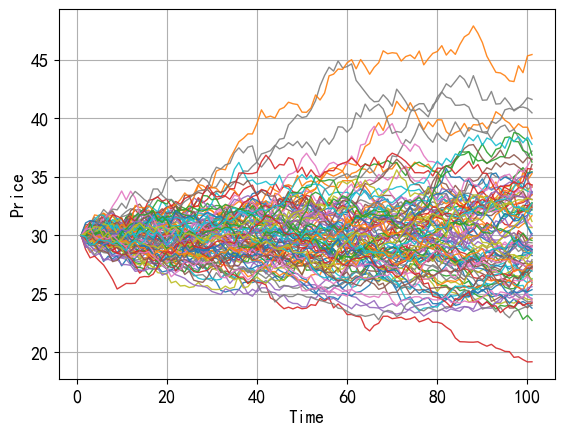

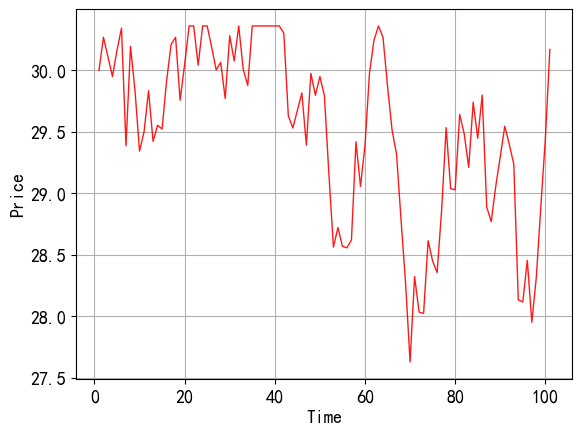

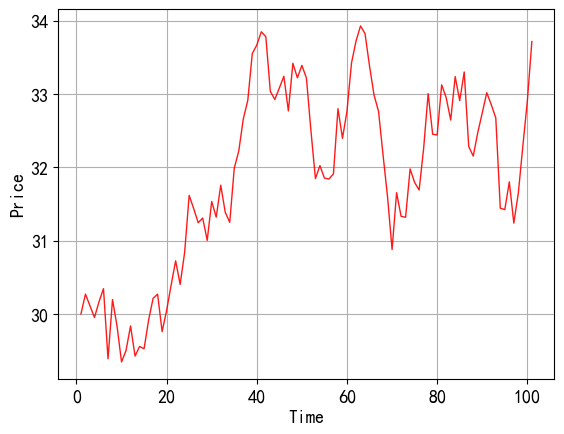

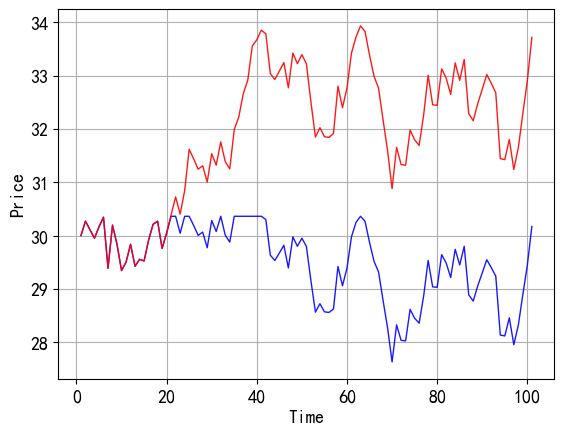

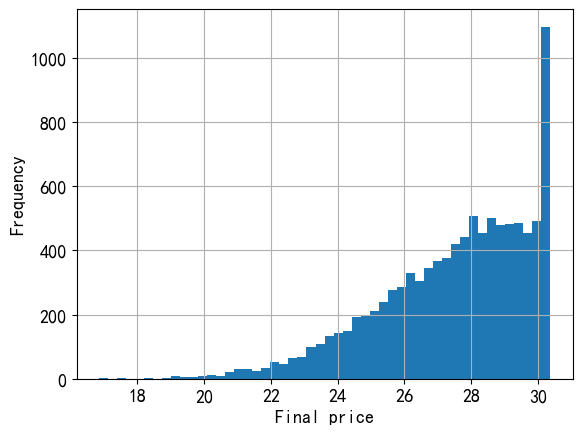

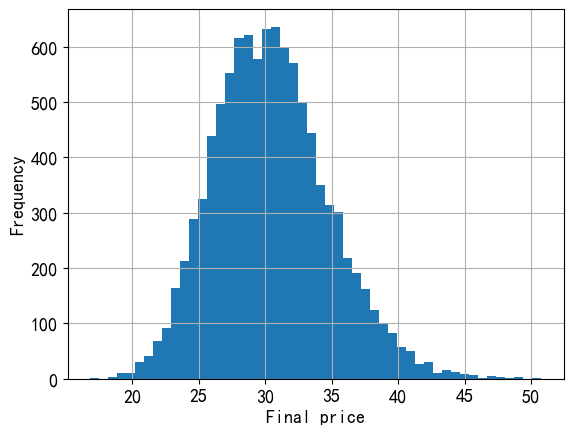

7.377071495632434

In [4]:
#MC_simple(S0,K,R,T,Sigma,N,M,b):
MC_simple(30,20,0.03,0.5,0.2,100,10000,0.012)

## 显式解

In [3]:
b=0.012
S0 = 30
K = 20
R = 0.03
T = 0.5
Sigma = 0.1
u = R-(Sigma**2)/2
C0 = []
up = 150
val = 1
#define L()
def L(x):
    A = exp((u+Sigma**2*x/2)*T*x)*(norm.cdf((b-u*T-Sigma**2*x*T)/(Sigma*sqrt(T)))-norm.cdf((max(log(K/S0),0)-u*T-Sigma**2*x*T)/(Sigma*sqrt(T)))\
                                +(norm.cdf((2*max(log(K/S0),0)-log(K/S0))/(Sigma*sqrt(T)))\
                                  -norm.cdf((max(log(K/S0),0)/Sigma*sqrt(T))))\
                                *(K/S0)**(x+u/Sigma**2)*exp(-(u+Sigma**2*x)**2*T/(2*Sigma**2)))
    return A
#define B()
def B(a1,a2,a3,a4):
    if a4>0:
        A = a4*(exp(-(a1+a3)**2/(2*a4))-exp(-(a2+a3)**2/(2*a4)))\
        -sqrt(2*pi*a4)*a3*(norm.cdf((a2+a3)/sqrt(a4))-norm.cdf((a1+a3)/sqrt(a4)))
    return A
#define B1()
def B1(a1,a2,a3,a4):
    if a4>0:
        A = a4*((a1-a3)*exp(-(a1+a3)**2/(2*a4))-(a2-a3)*exp(-(a2+a3)**2/(2*a4)))\
        +sqrt(2*pi*a4)*(a3**2+a4)*(norm.cdf((a2+a3)/sqrt(a4))-norm.cdf((a1+a3)/sqrt(a4)))
    return A
for i in np.arange(0.5, up, val):
    T = i
    #define I(1,1)
    I_1 = (1/(sqrt(2*pi)*R*Sigma*T**1.5))*((K/(S0*exp(b)))**(2*R/Sigma**2)*B(2*b-log(K/S0),inf,-u*T,Sigma**2*T)\
                                           +B(b,inf,-u*T,Sigma**2*T)-exp(((u+Sigma**2)**2*T-u**2*T+4*R*b)/(2*Sigma**2))\
                                           *B(b,2*b-log(K/S0),u*T,Sigma**2*T))
    #define I(0,0)
    I_0 = 1/(sqrt(2*pi)*u*Sigma*T**1.5)*(B(b,inf,-u*T,Sigma**2*T)-exp(2*u*b/Sigma**2)*B(b,2*b-log(K/S0),u*T,Sigma**2*T)\
                                        +(K/(S0*exp(b)))**(2*u/Sigma**2)*B(2*b-log(K/S0),inf,-u*T,Sigma**2*T))

    c = exp(-R*T)*(S0*L(1)-K*L(0)+S0*exp(b)*I_1-K*I_0)
    C0.append(c)
    
def MC_simple_0(S0,K,R,T,Sigma,N,M,b):
    deltaT=T/N
    # 生成正态随机数
    rand_arr=np.random.randn(M,N)
    L = [[]*(N) for i in range(M)]
    # 生成几何Brown运动
    logret=(R-0.5*Sigma**2)*deltaT+Sigma*np.sqrt(deltaT)*rand_arr
    for k in range(0,M):
        for i in range(0,N+1):
            if i==0:
                a = 0
            else:
                a = c+logret[k][i-1]
            if a>b:
                c = b
                L[k].append(b)
            else:
                c = a
                L[k].append(a)
    S=S0*np.exp(L)
    S1=np.c_[S0*np.ones((M,1)),S0*np.exp(np.cumsum(logret,1))]
    c0=np.exp(-R*T)*np.mean(np.maximum(S[:,-1]-K,0))
    c1=np.exp(-R*T)*np.mean(np.maximum(S1[:,-1]-K,0))
    return c0
C1 = []
for i in np.arange(0.5, up, val):
    #MC_simple(S0,K,R,T,Sigma,N,M,b):
    C1.append(MC_simple_0(30,20,0.03,i,0.1,200,10000,0.012))

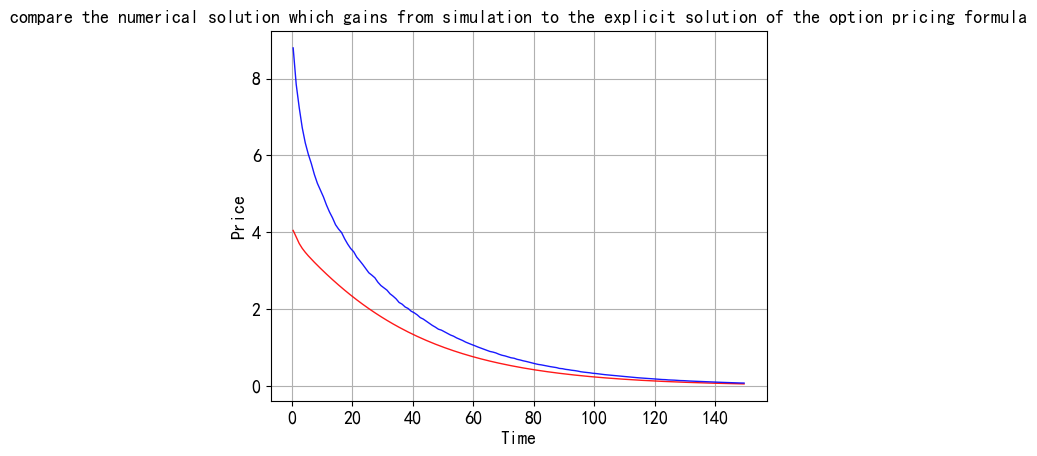

In [5]:
x=list(np.arange(0.5, up, val))
#红线为显式解
plt.plot(x,C0,lw=1, ls='-',alpha=0.9,color='red')
#蓝线为模拟所得的数值解
plt.plot(x,C1,lw=1, ls='-',alpha=0.9,color='blue')
plt.title("compare the numerical solution which gains from simulation to the explicit solution of the option pricing formula",fontsize=13)
plt.xlabel(u'Time',fontsize=13)
plt.ylabel(u'Price',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True)
plt.show() 


### 跳跃扩散模型 

In [6]:
#定义跳跃扩散的函数：
#模拟跳跃扩散过程
def Jump(S0,K,u,sigma,lamb,mu,delta,T,N,M,b):
    dt=T/N
    rj=lamb*(np.exp(mu+0.5*delta**2)-1)
    L = [[]*(N+1) for i in range(M)]
    S1=np.zeros((N+1,M))
    S1[0]=S0
    sn1=npr.standard_normal((N+1,M))
    sn2=npr.standard_normal((N+1,M))
    poi=npr.poisson(lamb*dt,(N+1,M))
    ind=np.exp((u-rj-0.5*sigma**2)*dt)+sigma*np.sqrt(dt)*sn1+(np.exp(mu+delta*sn2)-1)*poi
    ind=np.transpose(ind)
    # S1为没有barrier
    for t in range(1,N+1,1):
        S1[t]=S1[t-1]*(np.exp((u-rj-0.5*sigma**2)*dt)+sigma*np.sqrt(dt)*sn1[t]+(np.exp(mu+delta*sn2[t])-1)*poi[t])
        S1[t]=np.maximum(S1[t],0)

    # S为有barrier
    for k in range(0,M):
        for i in range(0,N+1):
            if i==0:
                a = 1
            else:
                a = c*ind[k][i-1]
            if a>b:
                c = b
                L[k].append(b)
            else:
                c = a
                L[k].append(a)    

    S = np.array(L)*S0

    c0=np.exp(-u*T)*np.mean(np.maximum(S[:,-1]-K,0))
    c1=np.exp(-u*T)*np.mean(np.maximum(S1[-1]-K,0))
    x=list(np.arange(1, N+2,1))
    return c1


boundary B =  105.0
under the b: 4.952452924746278
b approach to inf = 25.953044087877146


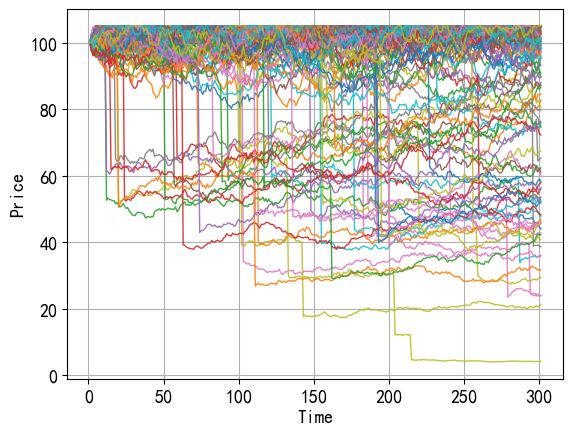

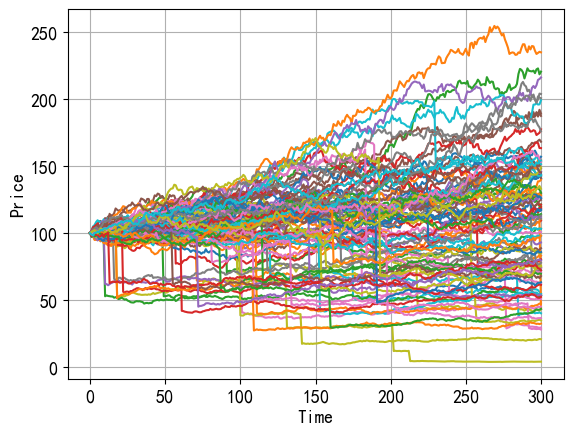

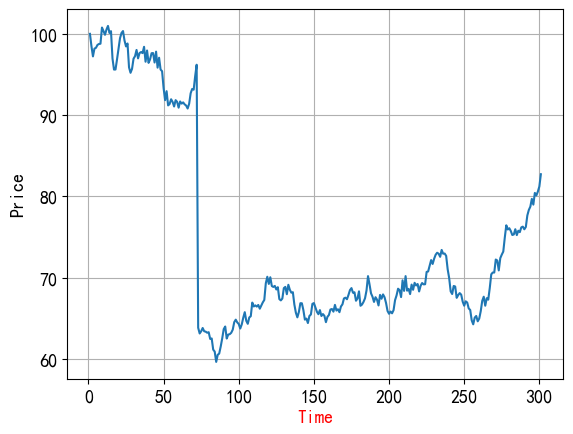

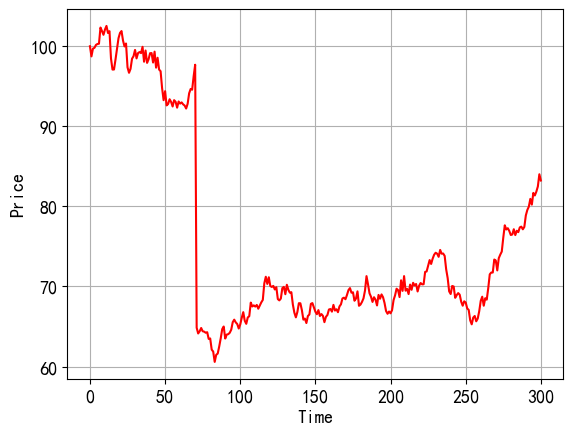

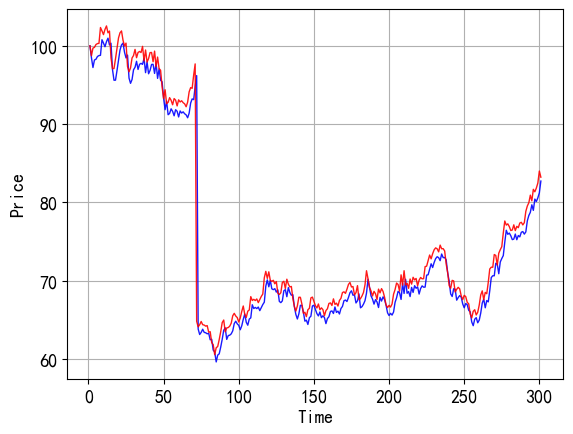

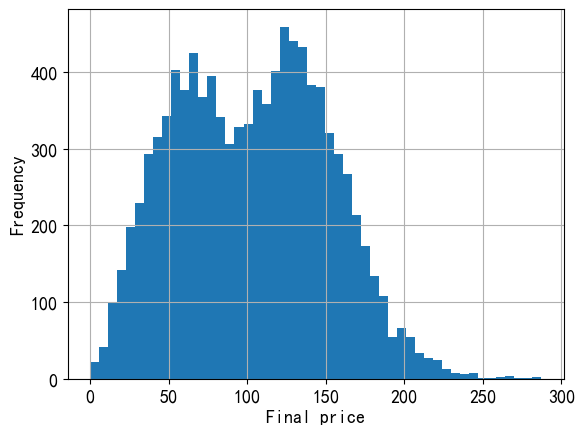

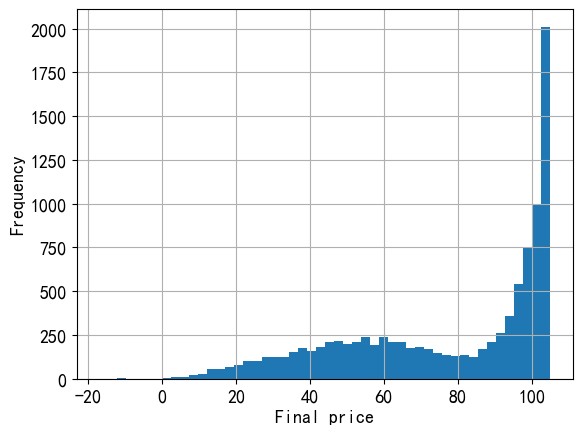

In [7]:
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
import numpy as np
import numpy.random as npr
#模拟跳跃扩散过程
S0=100   #证券的初始价格
u=0.05   #证书收益率的均值
sigma=0.2 #证券收益率的方差
lamb=0.75  #跳跃强度
mu=-0.6   #预期跳跃均值
delta=0.25  #跳跃强度的标准差
T=1.0    #年化时间长度
N=300    #年化时间分段数目
M=10000  #模拟的次数
dt=T/N   #模拟的每小步步长
b=1.05   #barrier
K=90 #期权执行价格

rj=lamb*(np.exp(mu+0.5*delta**2)-1)
L = [[]*(N+1) for i in range(M)]
S1=np.zeros((N+1,M))
S1[0]=S0
sn1=npr.standard_normal((N+1,M))
sn2=npr.standard_normal((N+1,M))
poi=npr.poisson(lamb*dt,(N+1,M))
ind=np.exp((u-rj-0.5*sigma**2)*dt)+sigma*np.sqrt(dt)*sn1+(np.exp(mu+delta*sn2)-1)*poi
ind=np.transpose(ind)
# S1为没有barrier
for t in range(1,N+1,1):
    S1[t]=S1[t-1]*(np.exp((u-rj-0.5*sigma**2)*dt)+sigma*np.sqrt(dt)*sn1[t]+(np.exp(mu+delta*sn2[t])-1)*poi[t])
    S1[t]=np.maximum(S1[t],0)

# S为有barrier
for k in range(0,M):
    for i in range(0,N+1):
        if i==0:
            a = 1
        else:
            a = c*ind[k][i-1]
        if a>b:
            c = b
            L[k].append(b)
        else:
            c = a
            L[k].append(a)    

S = np.array(L)*S0
print("boundary B = ",S0*b)
c0=np.exp(-u*T)*np.mean(np.maximum(S[:,-1]-K,0))
print("under the b:",c0 )
c1=np.exp(-u*T)*np.mean(np.maximum(S1[-1]-K,0))
print("b approach to inf =",c1)
####
#print(S[0])
#print(S1[:,0])
#100轨迹图（with barrier）
x=list(np.arange(1, N+2,1))
for i in range(100):
    plt.plot(x,S[i],lw=1, ls='-',alpha=0.9)
plt.xlabel(u'Time',fontsize=13)
plt.ylabel(u'Price',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True)
plt.show()
#100轨迹图（without barrier）
plt.plot(S1[:,:100],lw=1.5)
plt.xlabel(u'Time',fontsize=13)
plt.ylabel(u'Price',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True)
plt.show()
#单线轨迹 （with barrier）
plt.plot(x,S[1],lw=1.5)
plt.xlabel(u'Time',fontsize=13,color='red')
plt.ylabel(u'Price',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True)
plt.show()
#单线轨迹 （without barrier）
plt.plot(S1[:,1],lw=1.5,color='red')
plt.xlabel(u'Time',fontsize=13)
plt.ylabel(u'Price',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True)
plt.show()
#画出重叠图
plt.plot(x, S[1], lw=1, ls='-',alpha=0.9,color='blue')
plt.plot(x, S1[:,1], lw=1, ls='-',alpha=0.9,color='red')
plt.xlabel(u'Time',fontsize=13)
plt.ylabel(u'Price',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True)
plt.show()
#分布频数图
plt.hist(S1[-1],bins=50)
plt.xlabel(u'Final price',fontsize=13)
plt.ylabel(u'Frequency',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True)
plt.show()
#分布频数图
plt.hist(S[:,-1],bins=50)
plt.xlabel(u'Final price',fontsize=13)
plt.ylabel(u'Frequency',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True)
plt.show()